We're interested in learning about your ability to work with data and explain your findings.  Below is a real business problem:

Carrier A program at Tranzact wants to optimize their sales operations.  The program lead thinks a great way to do this is to prioritize dialing based on the liklihood a lead becomes a sale at any stage of the lead lifecycle (before activity, after x calls).  While they understand the value conceptually, they have not ironed out the details of how to get this information or how to use it.

Please write a brief report for the program lead that includes general findings, modelling results, and your recommendation for how to use this information for decision making.

To help you in this project we've included two datasets for the Carrier A program: Call Facts and Lead Facts.  Call Facts detail the activity on each dial (attempt) agents make to a lead.  Lead Facts are facts about the current state of the lead. 

Use your judgement about what aspects of the data would be of interest to the program lead.  The report should include visuals or tables that enable effective communication of important information and findings.  You are welcome to use any techniques or software you'd like to analyze the data; we just ask that you share your work.

Since there is additional information and data available to the leadership team, your report may include additional questions or requests that were prompted by the data.  We expect all work to be completed by you alone.  Please don't share these materials.

We look forward to reading your report.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [7]:
dfCall[dfCall['cdsCallsFactId'].isnull()]

,cdsCallsFactId,dimProgramId,dialerCallId,dialerLeadId,dimAgentId,callDate,callDateKey,callType,callTypeId,callDnis,dispoGroup,dispoCode,dispoDescription,callAttemptNumber,talkTimeSeconds,handleTimeSeconds,totalCalls,outboundCalls,outboundCallbacks,inboundCalls,manualCalls,inboundCallsHandled,callEndDate,callEndDateKey,nobleDispoCode,callSkill
132162,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
132163,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
132164,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
132165,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
132166,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339784,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
339785,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
339786,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
339787,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [4]:
fileName = '/Users/ranjeetsandhu/Downloads/DataAssessment.xlsx'
dfCall = pd.read_excel(fileName, sheet_name="Call Facts", engine='openpyxl')
dfLead = pd.read_excel(fileName, sheet_name="Lead Facts", engine='openpyxl')

In [5]:
dfCall1 = dfCall[dfCall['cdsCallsFactId'].notnull()]

- Pick `call skill` from calls data (Sale refers to call skill at that time, rest all should be current)
- `Call attempt number` from calls data (Number refer to sale at the time or total to date)
- `Sale` positive data label from calls data
- `Talk time`, `handle time` to be calculated till sale confirm in case of sales and rest total

In [44]:
grouping = dfCall1.groupby('dialerLeadId')

list_of_tuples = []
for dialer, group in grouping:
    if_sale = (group.dispoGroup == 'Sale').sum()
    if if_sale == 0:
        callSkill = float(group.tail(1).callSkill.values)
        callAttempts = float(group.tail(1).callAttemptNumber.values)
        tot_talkTime, tot_handleTime = group.talkTimeSeconds.sum(), group.handleTimeSeconds.sum()
        list_of_tuples.append((dialer, callSkill, callAttempts, tot_talkTime, tot_handleTime))
    else:
        index = (group.dispoGroup == 'Sale').idxmax()
        df_sliced = group.loc[:index]
        callSkill = float(df_sliced.loc[df_sliced.dispoGroup == 'Sale', 'callSkill'])
        callAttempts = float(df_sliced.loc[df_sliced.dispoGroup == 'Sale', 'callAttemptNumber'])
        tot_talkTime, tot_handleTime = df_sliced.talkTimeSeconds.sum(), df_sliced.handleTimeSeconds.sum()
        list_of_tuples.append((dialer, callSkill, callAttempts, tot_talkTime, tot_handleTime))
        
aggDF = pd.DataFrame(list_of_tuples, columns=['dialerLeadId', 'callSkill', 'callAttempts', 'totalTalkTime', 
                                              'totalHandleTime'])

### Analyzing total talk and handle time

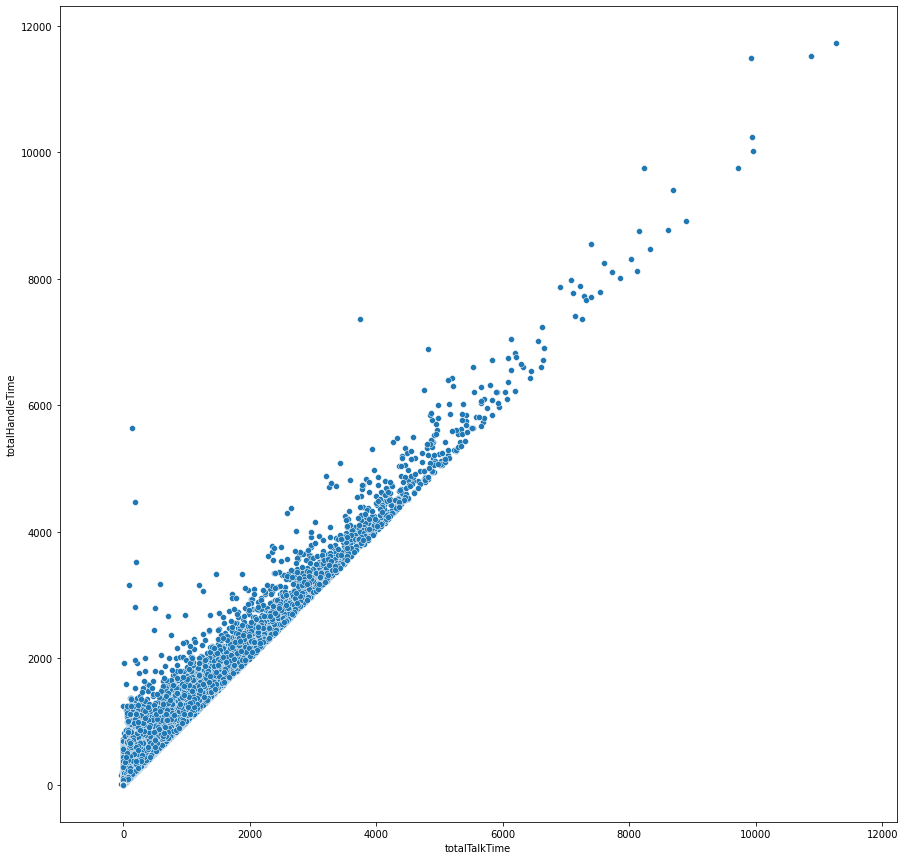

In [8]:
# Group the talk and handle time columns and compute mean
# dfTalkTimeSum = dfCall1.groupby('dialerLeadId').agg({'talkTimeSeconds':'sum', 'handleTimeSeconds':'sum'})

# dfTalkTimeSum['deltaTime'] = dfTalkTimeSum['handleTimeSeconds'] - dfTalkTimeSum['talkTimeSeconds']
# df_avg[df_avg['deltaTime'] < 0].deltaTime.sort_values() # -- 1177 values where talk time > handle time

# Plot the values where talk time is less than equal to handle time.
plt.axis('equal')
sns.scatterplot(x = 'totalTalkTime', y = 'totalHandleTime', data = aggDF); 

---

In [10]:
dfLead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31020 entries, 0 to 31019
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   cdsLeadFactId                        31020 non-null  int64         
 1   sourceSystem                         31020 non-null  object        
 2   sourceSystemId                       31020 non-null  object        
 3   cdsPersonId                          28598 non-null  float64       
 4   dimProgramId                         31020 non-null  int64         
 5   tztMarketingProject                  24753 non-null  float64       
 6   dialerLeadId                         31020 non-null  int64         
 7   omsMarketingProject                  0 non-null      float64       
 8   externalSystem                       0 non-null      float64       
 9   externalSystemId                     21387 non-null  object        
 10  leadDate  

- Pick `call skill` from calls data (Sale refers to call skill at that time, rest all should be current)
- `Call attempt number` from calls data (Number refer to sale at the time or total to date)
- `Sale` positive data label from calls data
- `Talk time`, `handle time` to be calculated till sale confirm in case of sales and rest total

In [37]:
dfLead.rename(columns={'campaign id': 'campaign_id'}, inplace=True)

drop_col = ['cdsLeadFactId', 
            'sourceSystemId', 
            'cdsPersonId', 
            'dimProgramId', 
            'tztMarketingProject', 
            'omsMarketingProject', 
            'externalSystem', 
            'externalSystemId', 
            'leadDate',
            'leadDateKey', 
            'dimMarketingSourceId', 
            'productOfInterest', 
            'originalInboundDnis', 
            'leadTypeId', 
            'leadZip', 
            'tobacco', 
            'leadCost', 
            'callCenterLeadCloneSourceId', 
            'callCenterDialAttempts',
            'leadsReceived', 
            'leadsAccepted', 
            'leadsRejected', 
            'rejectType', 
            'rejectReason', 
            'callCenterLeadsTotal', 
            'callCenterLeadEverSold', 
            'callCenterLatestDispo', 
            'callCenterLatestDispoDescription', 
            'batchid',
            'currentSkill',
            'originalSkill',
            'expirationInDays', 
            'maxAttempts',
            'dailyMaxAttempts', 
            'leadType']

lead = dfLead.drop(drop_col, axis=1)

In [38]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31020 entries, 0 to 31019
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   sourceSystem                         31020 non-null  object 
 1   dialerLeadId                         31020 non-null  int64  
 2   afid                                 30779 non-null  float64
 3   campaign_id                          25512 non-null  float64
 4   originalContactType                  30995 non-null  object 
 5   ageOnLeadGroup                       26689 non-null  object 
 6   gender                               25500 non-null  object 
 7   callCenterLeadCreatedReason          31020 non-null  object 
 8   callCenterMinutesToFirstDialAttempt  27776 non-null  float64
 9   callCenterLeadEverContacted          31020 non-null  int64  
 10  callCenterLatestDispoGroup           27751 non-null  object 
 11  deliveryMethod              

- **Drop records where `callCenterLatestDispoGroup` is `Null` (3269 records).**

In [39]:
lead1 = lead[lead['callCenterLatestDispoGroup'].notnull()]

In [40]:
lead1.set_index('dialerLeadId', inplace=True)

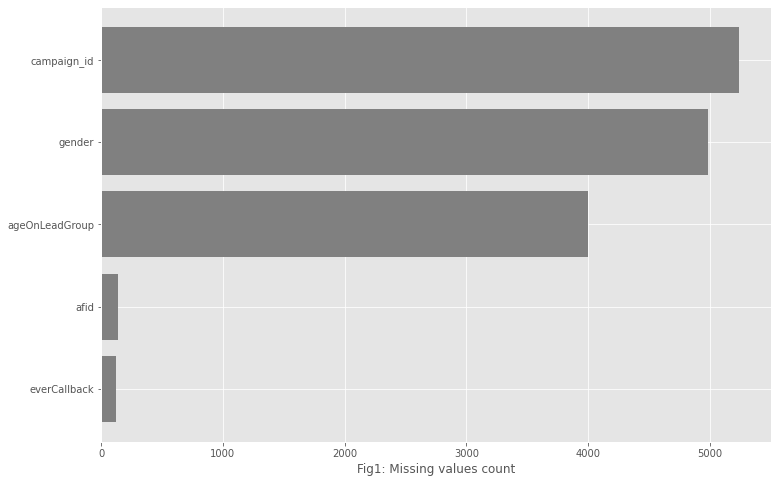

In [41]:
# Missing values count plot
nan_all = lead1.isna().sum()
missing = nan_all[nan_all != 0].sort_values()

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(missing.index, missing.values, color='gray')
ax.set_xlabel("Fig1: Missing values count");

### `Dialer Lead Id` differences between `Lead` and `Call` datasets

#### `None` Found in original data

In [45]:
leadSet = set(lead.dialerLeadId)
callSet = set(aggDF.dialerLeadId)

In [46]:
not_in_leads = list(callSet.difference(leadSet))

In [47]:
not_in_leads

[]

### `Dialer Lead Id` comparison for `sales` in both data frames

In [48]:
# Unique values of dialerLeadId in both tables - finding 'Sale' disposition discrepancy

saleCallId = set(dfCall1[dfCall1['dispoGroup'] == 'Sale'].dialerLeadId)
saleLeadId = set(lead1[lead1['callCenterLatestDispoGroup'] == 'Sale'].index)
diffList = list(saleCallId.difference(saleLeadId))

In [52]:
lead_sale_data = lead1.loc[diffList]

mask = (dfCall1['dialerLeadId'].isin(diffList)) & (dfCall1['dispoGroup'] == 'Sale')
call_sale_data = dfCall1[mask]

In [56]:
# Investigate Leads and Calls data where 'dialerLeadId' is associated with dispo group 'Sale' in calls data but not 
# in leads data.

lead_skill = lead_sale_data[['callCenterLatestDispoGroup']]
call_skill = call_sale_data[['dialerLeadId', 'dispoDescription']]
pd.merge(lead_skill, call_skill, on = 'dialerLeadId')

,dialerLeadId,callCenterLatestDispoGroup,dispoDescription
0,2969601.0,No Sale,Sale
1,3098628.0,No Sale,Sale
2,2646024.0,Transfer Call,Sale
3,3149833.0,No Sale,Sale
4,3131406.0,No Sale,Sale
...,...,...,...
556,3190762.0,No Sale,Sale
557,3377137.0,No Sale,Sale
558,2961397.0,No Sale,Sale
559,3321846.0,Transfer Call,Sale


**Replace the sales disposition with correct value as reflected in `Calls` data**

In [57]:
lead1

,sourceSystem,afid,campaign_id,originalContactType,ageOnLeadGroup,gender,callCenterLeadCreatedReason,callCenterMinutesToFirstDialAttempt,callCenterLeadEverContacted,callCenterLatestDispoGroup,deliveryMethod,everCallback
dialerLeadId,,,,,,,,,,,,
2311300,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2100.0,0,Still Workable,Data,0.0
2311301,tztLeads,363047.0,3.0,OB,71 - 80,F,Import,2097.0,1,Transfer Call,Data,0.0
2311310,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2083.0,0,Still Workable,Data,1.0
2311318,tztLeads,363045.0,3.0,OB,61 - 70,M,Import,2063.0,0,Still Workable,Data,0.0
2311317,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2064.0,1,No Sale,Data,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3426406,tztLeads,264294.0,18.0,OB,71 - 80,F,Import,3649.0,0,Non Workable,Data,0.0
3426515,tztLeads,316693.0,18.0,OB,61 - 70,F,Import,3577.0,1,No Sale,Data,0.0
3426522,tztLeads,264294.0,18.0,OB,61 - 70,M,Import,3567.0,1,No Sale,Data,0.0


In [65]:
lead2 = lead1.copy()

mask = lead2.loc[diffList]
lead2.loc[mask.index, 'callCenterLatestDispoGroup'] = 'Sale'

In [74]:
lead2.groupby('callCenterLatestDispoGroup').agg({'sourceSystem':'count'})

,sourceSystem
callCenterLatestDispoGroup,
Agent Call Back,547
Do Not Call,197
No Sale,9690
Non Workable,3301
Sale,1648
Still Workable,9726
System disposition,170
Transfer Call,2472


In [78]:
aggDF.set_index('dialerLeadId', inplace=True)

#### Join leads and calls datasets

In [80]:
# Merge the Leads and Calls data frames on dialerLeadId index, keeping all records from Leads table

dfFinal = pd.merge(lead2, aggDF, on = 'dialerLeadId', how = 'left')

In [81]:
dfFinal

,sourceSystem,afid,campaign_id,originalContactType,ageOnLeadGroup,gender,callCenterLeadCreatedReason,callCenterMinutesToFirstDialAttempt,callCenterLeadEverContacted,callCenterLatestDispoGroup,deliveryMethod,everCallback,callSkill,callAttempts,totalTalkTime,totalHandleTime
dialerLeadId,,,,,,,,,,,,,,,,
2311300.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2100.0,0,Still Workable,Data,0.0,22.0,4.0,77.0,127.0
2311301.0,tztLeads,363047.0,3.0,OB,71 - 80,F,Import,2097.0,1,Transfer Call,Data,0.0,2.0,1.0,779.0,802.0
2311310.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2083.0,0,Still Workable,Data,1.0,22.0,6.0,239.0,394.0
2311318.0,tztLeads,363045.0,3.0,OB,61 - 70,M,Import,2063.0,0,Still Workable,Data,0.0,22.0,5.0,60.0,396.0
2311317.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2064.0,1,No Sale,Data,0.0,11.0,2.0,400.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426406.0,tztLeads,264294.0,18.0,OB,71 - 80,F,Import,3649.0,0,Non Workable,Data,0.0,2.0,1.0,0.0,11.0
3426515.0,tztLeads,316693.0,18.0,OB,61 - 70,F,Import,3577.0,1,No Sale,Data,0.0,2.0,1.0,112.0,222.0
3426522.0,tztLeads,264294.0,18.0,OB,61 - 70,M,Import,3567.0,1,No Sale,Data,0.0,22.0,7.0,390.0,1229.0


In [33]:
# still_workable = dfFinal['callCenterLatestDispoGroup'] != 'Still Workable'
# dfFinal1 = dfFinal[still_workable]
# do_not_call = lead1['callCenterLatestDispoGroup'] != 'Do Not Call'
# lead1[not_workable | do_not_call]

### Identifying categories to encode the variables based on their class distributions to limit feature space

- **campaign_id** club values other than 3, 17, 18, 15 into a different category. Label the missing values as 9999.

#### `campaign_id`

In [88]:
dfFinal[dfFinal['callCenterLatestDispoGroup'] == 'Sale']['campaign_id'].value_counts()

3.0     626
17.0    223
18.0    218
15.0    109
2.0       5
7.0       5
13.0      3
16.0      1
10.0      1
12.0      1
1.0       1
14.0      1
Name: campaign_id, dtype: int64

In [89]:
dfFinal['campaign_id'].value_counts()

3.0     7430
17.0    6839
18.0    4791
15.0    3250
2.0      131
14.0      19
7.0       17
13.0      11
12.0       7
16.0       6
6.0        3
4.0        2
10.0       2
1.0        2
19.0       1
Name: campaign_id, dtype: int64

In [90]:
dfFinal['campaign_id'].isnull().sum()

5240

In [91]:
dfFinal1 = dfFinal.copy()

mask = dfFinal1['campaign_id'].isnull()
dfFinal1.loc[mask, 'campaign_id'] = 999999

#### `gender`

**Combine `gender` null values and values equal to zero into category `Unknown`**

In [92]:
dfFinal1['gender'].value_counts()

F    12259
M    10485
U       21
0        2
Name: gender, dtype: int64

In [93]:
dfFinal1['gender'].isnull().sum()

4984

In [94]:
dfFinal2 = dfFinal1.copy()

mask = (dfFinal2['gender'].isnull()) | (dfFinal2['gender'] == 0)
dfFinal2.loc[mask, 'gender'] = 'U'

#### `ageOnLeadGroup`

In [95]:
dfFinal2['ageOnLeadGroup'].value_counts()

61 - 70     16701
71 - 80      5879
81 - 90       830
Over 90       126
51 - 60       114
41 - 50        38
31 - 40        35
20 - 30        24
Under 20        6
Name: ageOnLeadGroup, dtype: int64

In [96]:
dfFinal2['ageOnLeadGroup'].isnull().sum()

3998

In [97]:
dfFinal3 = dfFinal2.copy()

mask = dfFinal3['ageOnLeadGroup'].isnull()
dfFinal3.loc[mask, 'ageOnLeadGroup'] = 'U'

In [98]:
dfFinal3

,sourceSystem,afid,campaign_id,originalContactType,ageOnLeadGroup,gender,callCenterLeadCreatedReason,callCenterMinutesToFirstDialAttempt,callCenterLeadEverContacted,callCenterLatestDispoGroup,deliveryMethod,everCallback,callSkill,callAttempts,totalTalkTime,totalHandleTime
dialerLeadId,,,,,,,,,,,,,,,,
2311300.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2100.0,0,Still Workable,Data,0.0,22.0,4.0,77.0,127.0
2311301.0,tztLeads,363047.0,3.0,OB,71 - 80,F,Import,2097.0,1,Transfer Call,Data,0.0,2.0,1.0,779.0,802.0
2311310.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2083.0,0,Still Workable,Data,1.0,22.0,6.0,239.0,394.0
2311318.0,tztLeads,363045.0,3.0,OB,61 - 70,M,Import,2063.0,0,Still Workable,Data,0.0,22.0,5.0,60.0,396.0
2311317.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2064.0,1,No Sale,Data,0.0,11.0,2.0,400.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426406.0,tztLeads,264294.0,18.0,OB,71 - 80,F,Import,3649.0,0,Non Workable,Data,0.0,2.0,1.0,0.0,11.0
3426515.0,tztLeads,316693.0,18.0,OB,61 - 70,F,Import,3577.0,1,No Sale,Data,0.0,2.0,1.0,112.0,222.0
3426522.0,tztLeads,264294.0,18.0,OB,61 - 70,M,Import,3567.0,1,No Sale,Data,0.0,22.0,7.0,390.0,1229.0


#### `afid`

**Replace `afid` null values with `999999` as some of these include `sales` data.**

In [99]:
dfFinal4 = dfFinal3.copy()

mask = dfFinal4['afid'].isnull()
dfFinal4.loc[mask, 'afid'] = 999999

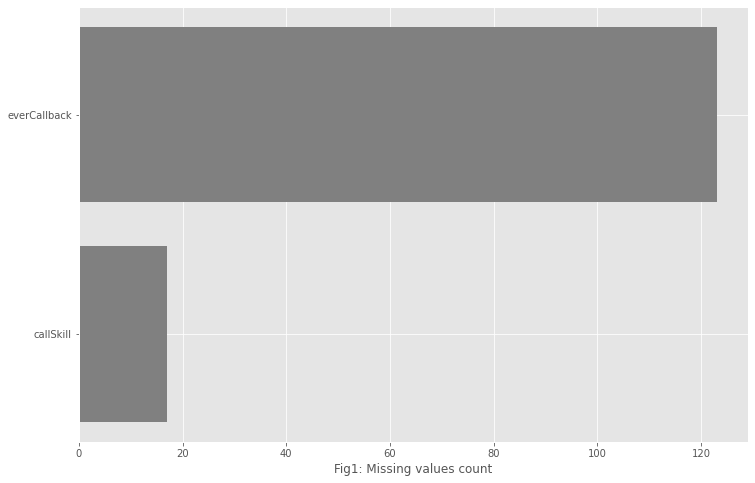

In [100]:
# Missing values count plot
nan_all = dfFinal4.isna().sum()
missing = nan_all[nan_all != 0].sort_values()

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(missing.index, missing.values, color='gray')
ax.set_xlabel("Fig1: Missing values count");

#### `everCallback` & `callSkill`

**Drop `everCallback` & `callSkill` null values as no sales data is present and no information about these missing data can be inferred from other columns in either of the tables** 

In [105]:
complete_cases = (dfFinal4['everCallback'].notnull()) & (dfFinal4['callSkill'].notnull())
dfFinal5 = dfFinal4[complete_cases]

In [106]:
dfFinal5

,sourceSystem,afid,campaign_id,originalContactType,ageOnLeadGroup,gender,callCenterLeadCreatedReason,callCenterMinutesToFirstDialAttempt,callCenterLeadEverContacted,callCenterLatestDispoGroup,deliveryMethod,everCallback,callSkill,callAttempts,totalTalkTime,totalHandleTime
dialerLeadId,,,,,,,,,,,,,,,,
2311300.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2100.0,0,Still Workable,Data,0.0,22.0,4.0,77.0,127.0
2311301.0,tztLeads,363047.0,3.0,OB,71 - 80,F,Import,2097.0,1,Transfer Call,Data,0.0,2.0,1.0,779.0,802.0
2311310.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2083.0,0,Still Workable,Data,1.0,22.0,6.0,239.0,394.0
2311318.0,tztLeads,363045.0,3.0,OB,61 - 70,M,Import,2063.0,0,Still Workable,Data,0.0,22.0,5.0,60.0,396.0
2311317.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2064.0,1,No Sale,Data,0.0,11.0,2.0,400.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426378.0,tztLeads,316693.0,18.0,OB,61 - 70,F,Import,3660.0,1,No Sale,Data,0.0,2.0,1.0,801.0,1100.0
3426406.0,tztLeads,264294.0,18.0,OB,71 - 80,F,Import,3649.0,0,Non Workable,Data,0.0,2.0,1.0,0.0,11.0
3426515.0,tztLeads,316693.0,18.0,OB,61 - 70,F,Import,3577.0,1,No Sale,Data,0.0,2.0,1.0,112.0,222.0


### Calibrate probabilities of `afid` in terms of number of sales

In [112]:
df = dfFinal5.reset_index()

In [110]:
# df.to_csv('final_features.csv', index=False)

In [113]:
sale_data = df[df['callCenterLatestDispoGroup'] == 'Sale']
mapping = sale_data.groupby('afid')\
                   .agg({'dialerLeadId':'count'})\
                   .apply(lambda x: x/x.sum())

In [115]:
mapping.rename(columns={'dialerLeadId': 'afid_sales_probability'}, inplace=True)
mapping = mapping.reset_index()

In [116]:
mapper_afid = dict()
for index, row in mapping.iterrows():
    mapper_afid[row['afid']] = row['afid_sales_probability']

In [117]:
df1 = df.copy()
df1['afid_sales_probability'] = df['afid'].map(mapper_afid)

In [ ]:
# Verify probabilites sum to zero

# df2 = df1.copy()
# df2['rank'] = df2.groupby('afid')['afid_sales_probability'].rank(method='first')
# df2[df2['rank'] == 1].afid_sales_probability.sum()

---

**Categorical label mappings for readability**

In [118]:
df1

,dialerLeadId,sourceSystem,afid,campaign_id,originalContactType,ageOnLeadGroup,gender,callCenterLeadCreatedReason,callCenterMinutesToFirstDialAttempt,callCenterLeadEverContacted,callCenterLatestDispoGroup,deliveryMethod,everCallback,callSkill,callAttempts,totalTalkTime,totalHandleTime,afid_sales_probability
0,2311300.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2100.0,0,Still Workable,Data,0.0,22.0,4.0,77.0,127.0,0.128386
1,2311301.0,tztLeads,363047.0,3.0,OB,71 - 80,F,Import,2097.0,1,Transfer Call,Data,0.0,2.0,1.0,779.0,802.0,0.128386
2,2311310.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2083.0,0,Still Workable,Data,1.0,22.0,6.0,239.0,394.0,0.128386
3,2311318.0,tztLeads,363045.0,3.0,OB,61 - 70,M,Import,2063.0,0,Still Workable,Data,0.0,22.0,5.0,60.0,396.0,0.036397
4,2311317.0,tztLeads,363047.0,3.0,OB,61 - 70,F,Import,2064.0,1,No Sale,Data,0.0,11.0,2.0,400.0,440.0,0.128386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,3426378.0,tztLeads,316693.0,18.0,OB,61 - 70,F,Import,3660.0,1,No Sale,Data,0.0,2.0,1.0,801.0,1100.0,0.046574
27608,3426406.0,tztLeads,264294.0,18.0,OB,71 - 80,F,Import,3649.0,0,Non Workable,Data,0.0,2.0,1.0,0.0,11.0,0.042445
27609,3426515.0,tztLeads,316693.0,18.0,OB,61 - 70,F,Import,3577.0,1,No Sale,Data,0.0,2.0,1.0,112.0,222.0,0.046574
27610,3426522.0,tztLeads,264294.0,18.0,OB,61 - 70,M,Import,3567.0,1,No Sale,Data,0.0,22.0,7.0,390.0,1229.0,0.042445


In [ ]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# encoder = LabelEncoder()
# sourceSystem_label = encoder.fit_transform(df['callCenterLeadCreatedReason'])

In [119]:
df2 = pd.get_dummies(df1, columns=['sourceSystem'], drop_first=True, prefix='sourceSys')

In [120]:
df2

,dialerLeadId,afid,campaign_id,originalContactType,ageOnLeadGroup,gender,callCenterLeadCreatedReason,callCenterMinutesToFirstDialAttempt,callCenterLeadEverContacted,callCenterLatestDispoGroup,deliveryMethod,everCallback,callSkill,callAttempts,totalTalkTime,totalHandleTime,afid_sales_probability,sourceSys_tztLeads
0,2311300.0,363047.0,3.0,OB,61 - 70,F,Import,2100.0,0,Still Workable,Data,0.0,22.0,4.0,77.0,127.0,0.128386,1
1,2311301.0,363047.0,3.0,OB,71 - 80,F,Import,2097.0,1,Transfer Call,Data,0.0,2.0,1.0,779.0,802.0,0.128386,1
2,2311310.0,363047.0,3.0,OB,61 - 70,F,Import,2083.0,0,Still Workable,Data,1.0,22.0,6.0,239.0,394.0,0.128386,1
3,2311318.0,363045.0,3.0,OB,61 - 70,M,Import,2063.0,0,Still Workable,Data,0.0,22.0,5.0,60.0,396.0,0.036397,1
4,2311317.0,363047.0,3.0,OB,61 - 70,F,Import,2064.0,1,No Sale,Data,0.0,11.0,2.0,400.0,440.0,0.128386,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,3426378.0,316693.0,18.0,OB,61 - 70,F,Import,3660.0,1,No Sale,Data,0.0,2.0,1.0,801.0,1100.0,0.046574,1
27608,3426406.0,264294.0,18.0,OB,71 - 80,F,Import,3649.0,0,Non Workable,Data,0.0,2.0,1.0,0.0,11.0,0.042445,1
27609,3426515.0,316693.0,18.0,OB,61 - 70,F,Import,3577.0,1,No Sale,Data,0.0,2.0,1.0,112.0,222.0,0.046574,1
27610,3426522.0,264294.0,18.0,OB,61 - 70,M,Import,3567.0,1,No Sale,Data,0.0,22.0,7.0,390.0,1229.0,0.042445,1


In [121]:
df2.campaign_id.value_counts()

3.0         7386
17.0        6777
999999.0    5239
18.0        4762
15.0        3248
2.0          130
14.0          19
7.0           17
13.0          11
12.0           7
16.0           6
6.0            3
4.0            2
10.0           2
1.0            2
19.0           1
Name: campaign_id, dtype: int64

In [133]:
small_campaigns = [1, 4, 6, 7, 10, 12, 13, 14, 16, 19]
df2.loc[df2['campaign_id'].isin(small_campaigns), 'campaign_id'] = 0

In [134]:
df2.campaign_id.value_counts()

3.0         7386
17.0        6777
999999.0    5239
18.0        4762
15.0        3248
2.0          130
0.0           70
Name: campaign_id, dtype: int64

In [139]:
df3 = pd.get_dummies(df2, columns=['campaign_id'], drop_first=True, prefix='campaign')\
        .drop(['afid', 'totalHandleTime'], axis=1)

In [145]:
df4 = pd.get_dummies(df3, columns=['originalContactType', 'gender', 'deliveryMethod']\
                     , drop_first=True, prefix=['contactType', 'gender', 'deliveryMethod'])

In [146]:
df4

,dialerLeadId,ageOnLeadGroup,callCenterLeadCreatedReason,callCenterMinutesToFirstDialAttempt,callCenterLeadEverContacted,callCenterLatestDispoGroup,everCallback,callSkill,callAttempts,totalTalkTime,afid_sales_probability,sourceSys_tztLeads,campaign_2.0,campaign_3.0,campaign_15.0,campaign_17.0,campaign_18.0,campaign_999999.0,contactType_OB,gender_M,gender_U,deliveryMethod_Voice
0,2311300.0,61 - 70,Import,2100.0,0,Still Workable,0.0,22.0,4.0,77.0,0.128386,1,0,1,0,0,0,0,1,0,0,0
1,2311301.0,71 - 80,Import,2097.0,1,Transfer Call,0.0,2.0,1.0,779.0,0.128386,1,0,1,0,0,0,0,1,0,0,0
2,2311310.0,61 - 70,Import,2083.0,0,Still Workable,1.0,22.0,6.0,239.0,0.128386,1,0,1,0,0,0,0,1,0,0,0
3,2311318.0,61 - 70,Import,2063.0,0,Still Workable,0.0,22.0,5.0,60.0,0.036397,1,0,1,0,0,0,0,1,1,0,0
4,2311317.0,61 - 70,Import,2064.0,1,No Sale,0.0,11.0,2.0,400.0,0.128386,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,3426378.0,61 - 70,Import,3660.0,1,No Sale,0.0,2.0,1.0,801.0,0.046574,1,0,0,0,0,1,0,1,0,0,0
27608,3426406.0,71 - 80,Import,3649.0,0,Non Workable,0.0,2.0,1.0,0.0,0.042445,1,0,0,0,0,1,0,1,0,0,0
27609,3426515.0,61 - 70,Import,3577.0,1,No Sale,0.0,2.0,1.0,112.0,0.046574,1,0,0,0,0,1,0,1,0,0,0
27610,3426522.0,61 - 70,Import,3567.0,1,No Sale,0.0,22.0,7.0,390.0,0.042445,1,0,0,0,0,1,0,1,1,0,0


In [149]:
df4.callSkill.value_counts()

2.0     12318
22.0     9348
51.0     2543
11.0     2462
1.0       482
0.0       222
21.0      217
12.0       20
Name: callSkill, dtype: int64

In [150]:
# Combine small callSkills into single category - zero
small_callSkills = [1, 12, 21]
df4.loc[df4['callSkill'].isin(small_callSkills), 'callSkill'] = 0

In [152]:
df5 = pd.get_dummies(df4, columns=['callSkill']\
                     , drop_first=True, prefix=['callSkill'])

#### Combine Draft & Clone categories

In [159]:
df5.loc[df5.callCenterLeadCreatedReason.str.contains('Draft'), 'callCenterLeadCreatedReason'] = 'Draft'

In [161]:
df5.loc[df5.callCenterLeadCreatedReason.str.contains('Clone'), 'callCenterLeadCreatedReason'] = 'Clone'

In [162]:
df5.callCenterLeadCreatedReason.value_counts()

Import    21490
Draft      5863
Clone       259
Name: callCenterLeadCreatedReason, dtype: int64

In [163]:
df6 = pd.get_dummies(df5, columns=['callCenterLeadCreatedReason']\
                     , drop_first=True, prefix=['lead_reason'])

In [165]:
df6.ageOnLeadGroup.value_counts()

61 - 70     16608
71 - 80      5843
U            3996
81 - 90       822
Over 90       126
51 - 60       114
41 - 50        38
31 - 40        35
20 - 30        24
Under 20        6
Name: ageOnLeadGroup, dtype: int64

In [168]:
mapping = {'61 - 70':'Senior', '71 - 80':'Senior', '81 - 90':'Senior', 'Over 90':'Senior', '31 - 40':'MidAge',
           '41 - 50':'MidAge', '51 - 60':'MidAge', 'Under 20':'Young', '20 - 30':'Young', 'U':'Unknown'}
           
df6['ageOnLeadGroup'] = df6['ageOnLeadGroup'].replace(mapping)           

In [169]:
df6.ageOnLeadGroup.value_counts()

Senior     23399
Unknown     3996
MidAge       187
Young         30
Name: ageOnLeadGroup, dtype: int64

In [200]:
df7 = pd.get_dummies(df6, columns=['ageOnLeadGroup']\
                     , drop_first=True, prefix=['ageGroup'])

In [201]:
include_groups = ['No Sale', 'Sale']
mask = df7['callCenterLatestDispoGroup'].isin(include_groups)
df8 = df7.loc[mask]

In [202]:
df8

,dialerLeadId,callCenterMinutesToFirstDialAttempt,callCenterLeadEverContacted,callCenterLatestDispoGroup,everCallback,callAttempts,totalTalkTime,afid_sales_probability,sourceSys_tztLeads,campaign_2.0,campaign_3.0,campaign_15.0,campaign_17.0,campaign_18.0,campaign_999999.0,contactType_OB,gender_M,gender_U,deliveryMethod_Voice,callSkill_2.0,callSkill_11.0,callSkill_22.0,callSkill_51.0,lead_reason_Draft,lead_reason_Import,ageGroup_Senior,ageGroup_Unknown,ageGroup_Young
4,2311317.0,2064.0,1,No Sale,0.0,2.0,400.0,0.128386,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
12,2311404.0,1674.0,1,No Sale,0.0,1.0,87.0,0.128386,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
14,2311408.0,1623.0,1,No Sale,0.0,2.0,102.0,0.128386,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
15,2311411.0,1599.0,1,No Sale,0.0,1.0,137.0,0.042011,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0
22,2311439.0,1537.0,1,No Sale,1.0,1.0,775.0,0.068774,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27603,3426314.0,3690.0,1,No Sale,0.0,7.0,267.0,0.009416,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
27604,3426400.0,3650.0,1,No Sale,0.0,7.0,109.0,0.042445,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0
27607,3426378.0,3660.0,1,No Sale,0.0,1.0,801.0,0.046574,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0
27609,3426515.0,3577.0,1,No Sale,0.0,1.0,112.0,0.046574,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0


In [174]:
from collections import Counter
counter = Counter(df7.callCenterLatestDispoGroup)
print(counter)

Counter({'Still Workable': 9686, 'No Sale': 9671, 'Non Workable': 3228, 'Transfer Call': 2469, 'Sale': 1648, 'Agent Call Back': 545, 'Do Not Call': 195, 'System disposition': 170})


In [193]:
from sklearn import preprocessing
ord_enc = preprocessing.OrdinalEncoder()
df7['target'] = ord_enc.fit_transform(df7[['callCenterLatestDispoGroup']])

In [194]:
leads_x = df7.drop(['dialerLeadId', 'callCenterLatestDispoGroup', 'target'], axis=1)
leads_y = df7['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(leads_x, leads_y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [ ]:
def ml_dataset(dataframe, target):
    # split into inputs and outputs
    X, y = dataframe.drop(target, axis=1), dataframe[target]
    # select categorical features
    cat_ix = X.select_dtypes(include=['object']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix), ('n',StandardScaler(),num_ix)], remainder='passthrough') 
    X = ct.fit_transform(X)
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

In [204]:
from sklearn.svm import SVC
?SVC